In [27]:
import pymc3 as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

import scipy.stats as stats
%matplotlib inline

In [17]:
with pm.Model() as model:
    lambda_ = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", lambda_)
    data_plus_one =data_generator + 1

In [3]:
# Not working because of api differences between pymc and pymc3
#print(f"Children of 'lambda_': {lambda_.children}")
#print(data_generator.parents)
#print(data_generator.children)

In [4]:
lambda_.model

In [5]:
lambda_??

Type:            TransformedRV
String form:     poisson_param
File:            /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py
Source:         
class TransformedRV(TensorVariable):

    def __init__(self, type=None, owner=None, index=None, name=None,
                 distribution=None, model=None, transform=None,
                 total_size=None):
        """
        Parameters
        ----------

        type : theano type (optional)
        owner : theano owner (optional)
        name : str
        distribution : Distribution
        model : Model
        total_size : scalar Tensor (optional)
            needed for upscaling logp
        """
        if type is None:
            type = distribution.type
        super(TransformedRV, self).__init__(type, owner, index, name)

        self.transformation = transform

        if distribution is not None:
            self.model = model
            self.distribution = distribution

            tra

In [6]:
tst_model.vars

[poisson_param_log__, data_generator]

In [7]:
data_generator

data_generator

In [8]:
# Frustrating.  The book is all pymc2 and it seems the api has changed dramatically


In [9]:
with pm.Model() as stochastic_model:
    some_variable = pm.DiscreteUniform("discrete_uni_var", 0,4)
    beta_1 = pm.Uniform("beta_1", 0, 1)
    beta_2 = pm.Uniform("beta_2", 0, 1)
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)
    print(lambda_1.random())
    print(lambda_2.random())
    print(tau.random())

1.2214432329938947
4.318123259606107
7


In [10]:
n_data_points = 5
idx = np.arange(n_data_points)
with stochastic_model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [11]:
# theano
import theano.tensor as tt

In [12]:
with pm.Model() as theano_test:
    p1 = pm.Uniform("p", 0 , 1)
    p2 = 1 - p1
    p = tt.stack([p1, p2])
    
    assignment = pm.Categorical("assignment", p)

In [13]:
# Use observations in the models

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


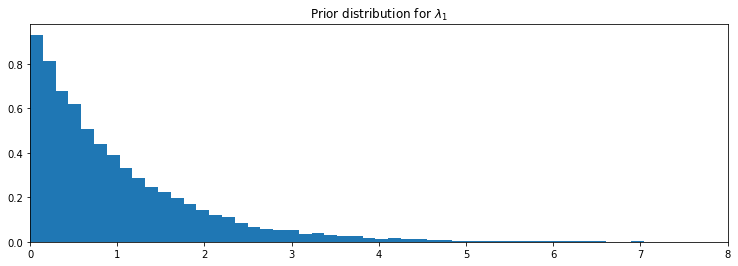

In [14]:
figsize(12.5, 4)
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [18]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fxd", 1, observed=data)
    print(f"value: {fixed_variable.tag.test_value}")

value: [10  5]


In [20]:
data = np.array([10, 25, 15, 20, 35])
with model:
    obs = pm.Poisson("obs", lambda_, observed=data)
    print(obs.tag.test_value)

[10 25 15 20 35]


In [34]:
tau = np.random.randint(0, 80)
tau

40

In [35]:
alpha = 1/20
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
print(lambda_1, lambda_2)

28.05756164445629 9.993451443866775


In [36]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80 - tau)]

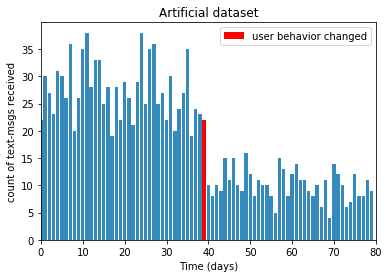

In [37]:
# plot artificial dataset
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80),
plt.legend()